<a href="https://colab.research.google.com/github/mjhoover1/autoencoders/blob/main/CIFAR10/Figure_Processing_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
!ls gdrive/MyDrive/CIFAR10_results/

 CIFAR10_Testing_Results_Organized.csv
'CIFAR10_Testing_Results_Organized - Sheet9(1).csv'


In [4]:

from csv import DictReader

In [9]:
#df = pd.read_csv("/content/gdrive/MyDrive/CIFAR10_Testing_Results_Organized - Sheet9(1).csv")
#df.dtypes
# open file in read mode
data = [{},{},{},{},{},{},{}]
data_norm_mean = [{},{},{},{},{},{},{}]
data_ab_mean = [{},{},{},{},{},{},{}]
ex_types = ["AE", "VAE", "modVAE b = 0", "modVAE b = 1/2", 'modeVAE b = 16']
with open('/content/gdrive/MyDrive/CIFAR10_results/CIFAR10_Testing_Results_Organized - Sheet9(1).csv', 'r') as read_obj:
    # pass the file object to DictReader() to get the DictReader object
    csv_dict_reader = DictReader(read_obj)
    for row in csv_dict_reader:
      if(row['Experiment'] == "N_Airplane_A_Cat"):
        data[0][row["Type"]] = float(row['Accuracy']) *100
        data_norm_mean[0][row["Type"]] = float(row['Normal_Reconstruction_Loss']) *100
        data_ab_mean[0][row["Type"]] = float(row['Abnormal Reconstruction_Loss']) *100
      if(row['Experiment'] == "N_Dog_A_Truck"):
        data[1][row["Type"]] = float(row['Accuracy']) *100
        data_norm_mean[1][row["Type"]] = float(row['Normal_Reconstruction_Loss']) *100
        data_ab_mean[1][row["Type"]] = float(row['Abnormal Reconstruction_Loss']) *100
      if(row['Experiment'] == "N_Frog_A_Ship"):
        data[2][row["Type"]] = float(row['Accuracy']) *100
        data_norm_mean[2][row["Type"]] = float(row['Normal_Reconstruction_Loss']) *100
        data_ab_mean[2][row["Type"]] = float(row['Abnormal Reconstruction_Loss']) *100
      if(row['Experiment'] == "N_Auto_A_Deer"):
        data[3][row["Type"]] = float(row['Accuracy']) *100
        data_norm_mean[3][row["Type"]] = float(row['Normal_Reconstruction_Loss']) *100
        data_ab_mean[3][row["Type"]] = float(row['Abnormal Reconstruction_Loss']) *100      
      if(row['Experiment'] == "N_Auto_Truck_A_Cat"):
        data[4][row["Type"]] = float(row['Accuracy']) *100
        data_norm_mean[4][row["Type"]] = float(row['Normal_Reconstruction_Loss']) *100
        data_ab_mean[4][row["Type"]] = float(row['Abnormal Reconstruction_Loss']) *100
      if(row['Experiment'] == "N_Cat_Dog_A_Airplane"):
        data[5][row["Type"]] = float(row['Accuracy']) *100
        data_norm_mean[5][row["Type"]] = float(row['Normal_Reconstruction_Loss']) *100
        data_ab_mean[5][row["Type"]] = float(row['Abnormal Reconstruction_Loss']) *100     
      if(row['Experiment'] == "N_Animals_A_Airplane"):
        data[6][row["Type"]] =  float(row['Accuracy']) *100
        data_norm_mean[6][row["Type"]] = float(row['Normal_Reconstruction_Loss']) *100
        data_ab_mean[6][row["Type"]] = float(row['Abnormal Reconstruction_Loss']) *100
      
org_data = {'AE':[],'VAE':[],'modVAE b = 0':[],'modVAE b = 1/2':[], 'modeVAE b = 16': []}
for row in data:
  for i in range(5):
    org_data[ex_types[i]].append(row[ex_types[i]])
for key in org_data: 
  avg = sum(org_data[key])/len(org_data[key])
  print(key + ":" + str(avg))
org_data_norm = {'AE':[],'VAE':[],'modVAE b = 0':[],'modVAE b = 1/2':[], 'modeVAE b = 16': []}
for row in data_norm_mean:
  for i in range(5):
    org_data_norm[ex_types[i]].append(row[ex_types[i]])
for key in org_data_norm: 
  avg = sum(org_data_norm[key])/len(org_data_norm[key])
  print(key + ":" + str(avg))
org_data_ab = {'AE':[],'VAE':[],'modVAE b = 0':[],'modVAE b = 1/2':[], 'modeVAE b = 16': []}
for row in data_ab_mean:
  for i in range(5):
    org_data_ab[ex_types[i]].append(row[ex_types[i]])
for key in org_data_ab: 
  avg = sum(org_data_ab[key])/len(org_data_ab[key])
  print(key + ":" + str(avg))


AE:56.43857142857143
VAE:56.22285714285715
modVAE b = 0:56.00428571428572
modVAE b = 1/2:55.66571428571428
modeVAE b = 16:57.198571428571434
AE:7.415714285714285
VAE:10.80285714285714
modVAE b = 0:10.68142857142857
modVAE b = 1/2:10.827142857142857
modeVAE b = 16:16.49857142857143
AE:7.837142857142856
VAE:11.382857142857143
modVAE b = 0:11.412857142857144
modVAE b = 1/2:11.404285714285715
modeVAE b = 16:17.702857142857145


In [10]:
experiments = ["N_Airplane_A_Cat", "N_Dog_A_Truck", "N_Frog_A_Ship", "N_Auto_A_Deer", "N_Auto_Truck_A_Cat", "N_Cat_Dog_A_Airplane", "N_Animals_A_Airplane"]
df = pd.DataFrame(org_data, index = experiments)  
df_norm = pd.DataFrame(org_data_norm, index = experiments)  
df_ab = pd.DataFrame(org_data_ab, index = experiments)  

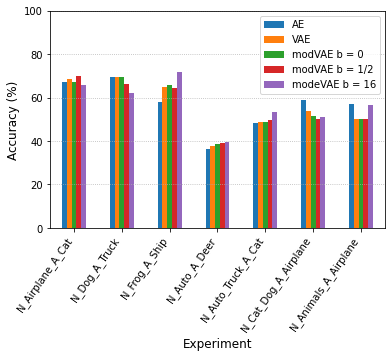

In [12]:
from pandas._libs import index
import numpy as np
import matplotlib.pyplot as plt

x_vars = ["N_Airplane_A_Cat",  "N_Dog_A_Truck",  "N_Frog_A_Ship",  "N_Auto_A_Deer", "N_Auto_Truck_A_Cat",  "N_Cat_Dog_A_Airplane",  "N_Animals_A_Airplane" ]

ax = df.plot(kind = "bar")
ax.grid(axis="y", linestyle=':')
ax.set_ylabel('Accuracy (%)', fontsize = 12)
ax.set_ylim(0, 100)
ax.set_xlabel('Experiment', fontsize = 12)
ax.set_xticklabels(x_vars, rotation=55, ha='right')
ax.legend(bbox_to_anchor=(1, 1.0), fontsize = 10)



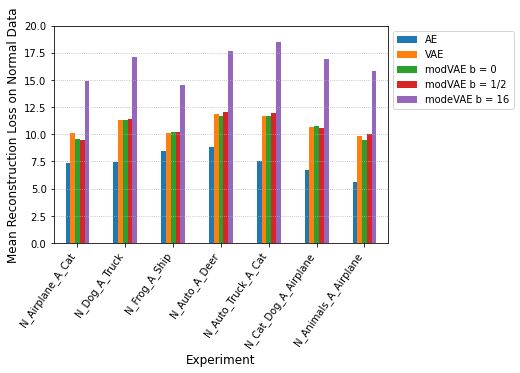

In [13]:
bx = df_norm.plot(kind = "bar")
bx.grid(axis="y", linestyle=':')
bx.set_ylabel('Mean Reconstruction Loss on Normal Data', fontsize = 12)
bx.set_ylim(0, 20)
bx.set_xlabel('Experiment', fontsize = 12)
bx.set_xticklabels(x_vars, rotation=55, ha='right')
bx.legend(bbox_to_anchor=(1, 1.0), fontsize = 10)

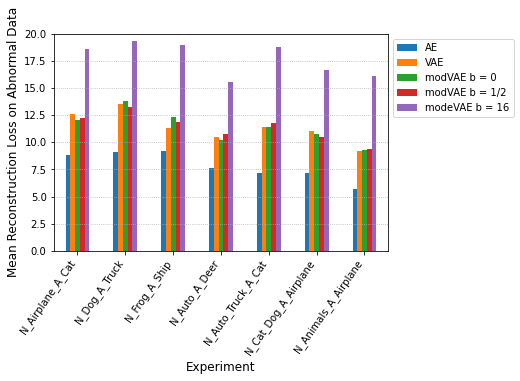

In [14]:
cx = df_ab.plot(kind = "bar")
cx.grid(axis="y", linestyle=':')
cx.set_ylabel('Mean Reconstruction Loss on Abnormal Data', fontsize = 12)
cx.set_ylim(0, 20)
cx.set_xlabel('Experiment', fontsize = 12)
cx.set_xticklabels(x_vars, rotation=55, ha='right')
cx.legend(bbox_to_anchor=(1, 1.0), fontsize = 10)